GEODATA-HARVESTER NOTEBOOK
--------------------------------

The Geodata-Harvester enables researchers with reusable workflows for automatic data extraction from a range of data sources including spatial-temporal processing into useable formats. User provided data is auto-completed with a suitable set of spatial- and temporal-aligned covariates as a ready-made dataset for machine learning and agriculture models. In addition, all requested data layer maps are automatically extracted and aligned for a specific region and time period.

The main workflow of the Harvester is as follows:

Options and user settings (e.g., data layer selections, spatial coverage, temporal constraints, i/o directory names) are defined by the user in the notebook settings menu or can be loaded with a settings yaml file (e.g., settings/settings_test). All settings are also saved in a yaml file for reusability.

The notebook imports settings and all Python modules that include functionality to download and extract data for each data source. After settings are read in, checked, and processed into valid data retrieval (API) queries, all selected data layers are sequentially downloaded and then processed into a clean dataframe table and co-registered raster maps. The entire workflow can be run either completely automatically or individually by selecting only certain process parts in the Notebook.
Additional data sources can be best added by writing the API handlers and extraction functionalities as separate Python module, which are then imported by the Notebook. Currently the following data sources are supported by the following modules:

- 'getdata_slga.py': Soil Data from Soil and Landscape Grid of Australia (SLGA)
- 'getdata_landscape': Landscape data from Soil and Landscape Grid of Australia (SLGA)
- 'getdata_silo.py': Climate Data from SILO
- 'getdata_dem.py: 'National Digital Elevation Model (DEM) 1 Second plus Slope and Apect calculation
- 'getdata_dea_nci.py: 'Digital Earth Australia's (DEA) Geoscience Earth Observations via NCI server
- 'getdata_dea.py: 'Digital Earth Australia's (DEA) Geoscience Earth Observations via Open Web Service server provided by DEA
- 'getdata_radiometric.py': Geoscience Australia National Geophysical Compilation Sub-collection Radiometrics
'eeharvest': Google Earth Engine API integration handler
For more details. please see README and the Data Overview page.

This notebook is part of the Data Harvester project developed for the Agricultural Research Federation (AgReFed).

Copyright 2023 Sydney Informatics Hub (SIH), The University of Sydney

### Import libraries

In [5]:
import os

# Import harvest function from geodata_harvester
from geodata_harvester import harvest

### Specify settings file

Set settings in settings YAML file beforehand, such as data-layer names, region, and dates. 

In [6]:
# Path to file:
path_settings = 'settings'
# Filename
fname_settings = 'settings_harvest.yaml'
infname = os.path.join(path_settings,fname_settings)

### Harvest

The harvest function executes automatically all download and processing steps for all data layers from the web as specified in settings file above.
Filenames of the processed files and some metadata is saved in a dataframe df.

Starting the data harvester -----
ℹ Found the following 7 sources: ['DEA', 'DEM', 'Landscape', 'Radiometric', 'SILO', 'SLGA', 'GEE']

⊙ Initialising Earth Engine... 0.0s                                                                            
✔ Done

⌛ Downloading Google Earth Engine data...
Running preprocess() -----
ℹ Number of image(s) found: 3
⊙ Applying scale, offset and cloud masks... 1.7s                                                               
⊙ Calculating spectral indices: NDVI... 1.4s                                                                   
✔ Preprocessing complete
Running download() -----
ℹ Band(s) selected: ['NDVI_median']
ℹ Setting scale to ~160.2m, converted from 6.0 arcsec at latitude -30.27
ℹ Setting download dir to results/
⊙ Downloading ee_LANDSAT_c609f132.tif 4.1s                                                                     
✔ Google Earth Engine download(s) complete

⌛ Downloading DEA data...
⊙ Downloading landsat_barest_earth.tif for None

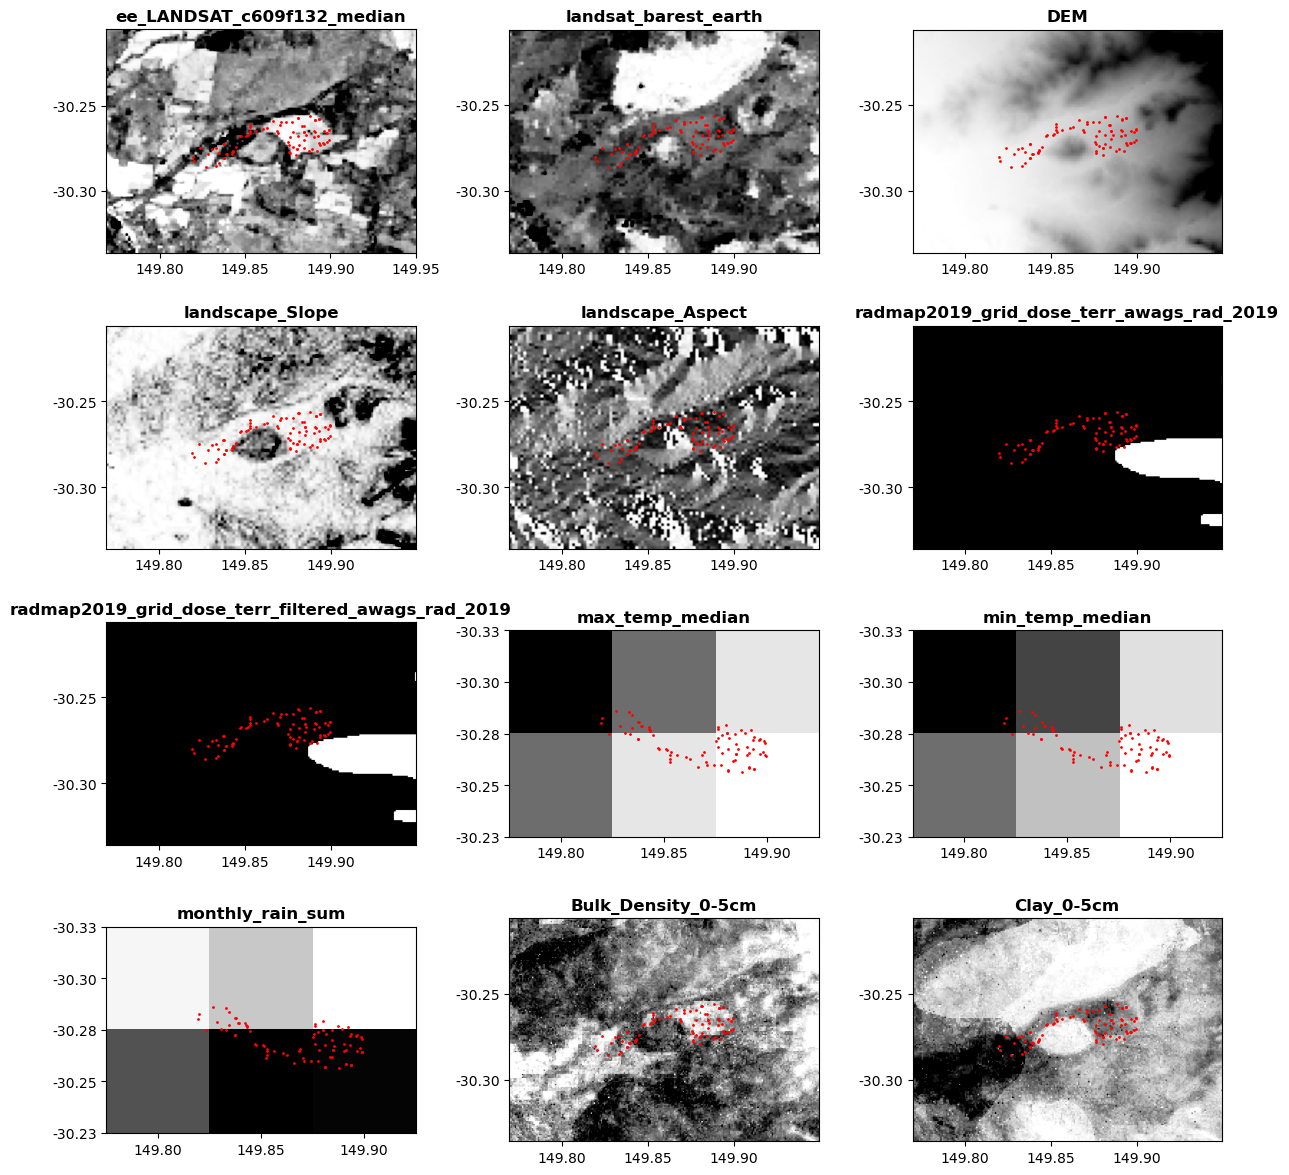


🎉 🎉 🎉 Harvest complete 🎉 🎉 🎉


In [7]:
df = harvest.run(infname, preview = True, return_df = True)

### Inspect result dataframe

In [8]:
# Inspect either entire generated dataframe with 
# df
# or only the first rows with
df.head()

,Longitude,Latitude,geometry,ee_LANDSAT_c609f132_median,landsat_barest_earth,DEM,landscape_Slope,landscape_Aspect,radmap2019_grid_dose_terr_awags_rad_2019,radmap2019_grid_dose_terr_filtered_awags_rad_2019,max_temp_median,min_temp_median,monthly_rain_sum,Bulk_Density_0-5cm,Clay_0-5cm
0,149.852680,-30.264663,POINT (149.85268 -30.26466),0.294885,1059,244.658585,1.046624,209.138062,33.151680,32.962944,22.700001,9.8,189.500000,1.368779,27.214527
1,149.884838,-30.265302,POINT (149.88484 -30.26530),0.123566,1082,264.428772,1.001000,279.542847,35.969486,35.945480,22.600000,9.5,189.000000,1.362662,31.956041
2,149.884838,-30.265302,POINT (149.88484 -30.26530),0.123566,1082,264.428772,1.001000,279.542847,35.969486,35.945480,22.600000,9.5,189.000000,1.362662,31.956041
3,149.838791,-30.278542,POINT (149.83879 -30.27854),0.318282,1092,233.005081,0.841430,242.743683,29.618393,29.478428,22.900000,10.1,173.199951,1.360451,32.675858
4,149.830843,-30.275437,POINT (149.83084 -30.27544),0.293676,1160,230.575439,1.062537,242.921112,25.061012,24.757614,22.900000,10.1,173.199951,1.334362,35.097813
